In [ ]:
#Principal component analysis

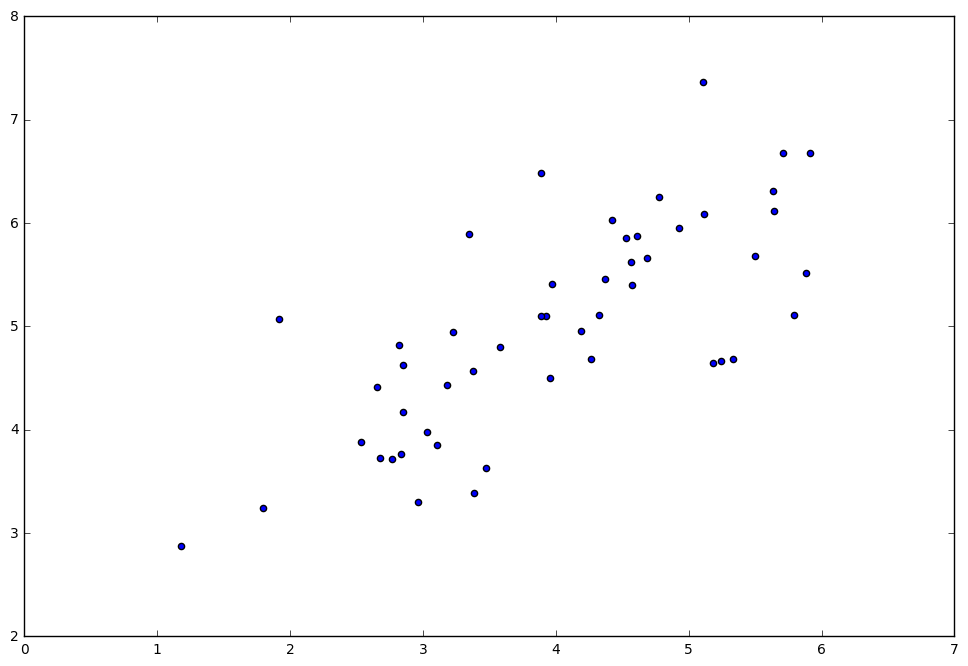

In [14]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt   
from scipy.io import loadmat  
%matplotlib inline
import os

path = os.getcwd() + '/ex7data1.mat'
data = loadmat(path) 
X = data['X']

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(X[:, 0], X[:, 1]) 

In [15]:
def pca(X):  
    # normalize the features
    X = (X - X.mean()) / X.std()

    # compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]

    # perform SVD
    U, S, V = np.linalg.svd(cov)

    return U, S, V

U, S, V = pca(X)  
U, S, V  

(matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]),
 array([ 1.43584536,  0.56415464]),
 matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]))

In [16]:
def project_data(X, U, k):  
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)

Z = project_data(X, U, 1)  
Z  

matrix([[-4.74689738],
        [-7.15889408],
        [-4.79563345],
        [-4.45754509],
        [-4.80263579],
        [-7.04081342],
        [-4.97025076],
        [-8.75934561],
        [-6.2232703 ],
        [-7.04497331],
        [-6.91702866],
        [-6.79543508],
        [-6.3438312 ],
        [-6.99891495],
        [-4.54558119],
        [-8.31574426],
        [-7.16920841],
        [-5.08083842],
        [-8.54077427],
        [-6.94102769],
        [-8.5978815 ],
        [-5.76620067],
        [-8.2020797 ],
        [-6.23890078],
        [-4.37943868],
        [-5.56947441],
        [-7.53865023],
        [-7.70645413],
        [-5.17158343],
        [-6.19268884],
        [-6.24385246],
        [-8.02715303],
        [-4.81235176],
        [-7.07993347],
        [-5.45953289],
        [-7.60014707],
        [-4.39612191],
        [-7.82288033],
        [-3.40498213],
        [-6.54290343],
        [-7.17879573],
        [-5.22572421],
        [-4.83081168],
        [-7

In [17]:
def recover_data(Z, U, k):  
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

X_recovered = recover_data(Z, U, 1)  
X_recovered  

matrix([[ 3.76152442,  2.89550838],
        [ 5.67283275,  4.36677606],
        [ 3.80014373,  2.92523637],
        [ 3.53223661,  2.71900952],
        [ 3.80569251,  2.92950765],
        [ 5.57926356,  4.29474931],
        [ 3.93851354,  3.03174929],
        [ 6.94105849,  5.3430181 ],
        [ 4.93142811,  3.79606507],
        [ 5.58255993,  4.29728676],
        [ 5.48117436,  4.21924319],
        [ 5.38482148,  4.14507365],
        [ 5.02696267,  3.8696047 ],
        [ 5.54606249,  4.26919213],
        [ 3.60199795,  2.77270971],
        [ 6.58954104,  5.07243054],
        [ 5.681006  ,  4.37306758],
        [ 4.02614513,  3.09920545],
        [ 6.76785875,  5.20969415],
        [ 5.50019161,  4.2338821 ],
        [ 6.81311151,  5.24452836],
        [ 4.56923815,  3.51726213],
        [ 6.49947125,  5.00309752],
        [ 4.94381398,  3.80559934],
        [ 3.47034372,  2.67136624],
        [ 4.41334883,  3.39726321],
        [ 5.97375815,  4.59841938],
        [ 6.10672889,  4.700

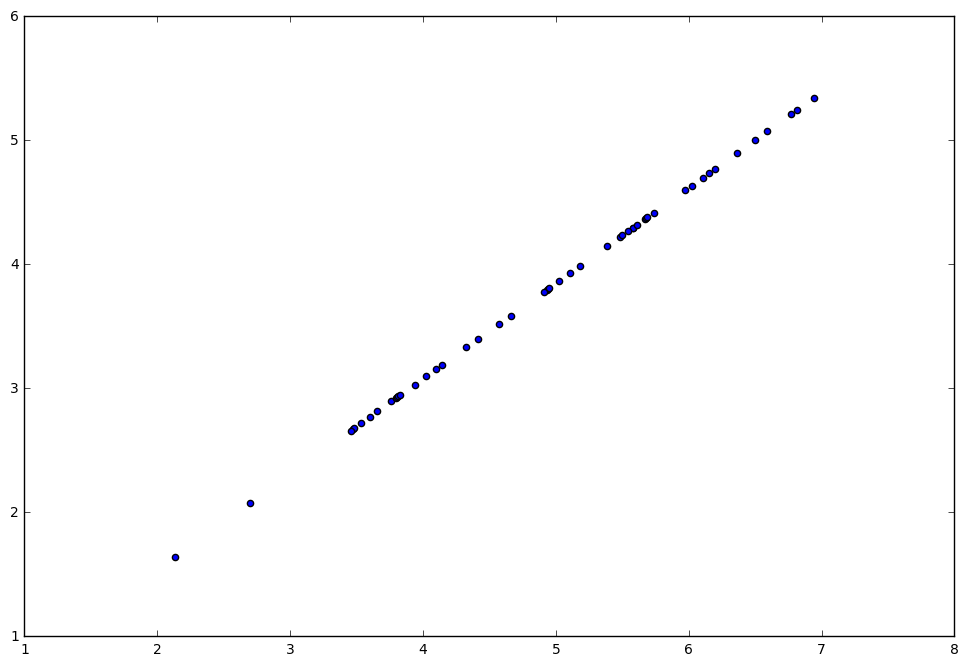

In [18]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(X_recovered[:, 0], X_recovered[:, 1])  

In [19]:
path=os.getcwd()+('/ex7faces.mat')
faces = loadmat(path)  
X = faces['X']  
X.shape 

(5000, 1024)

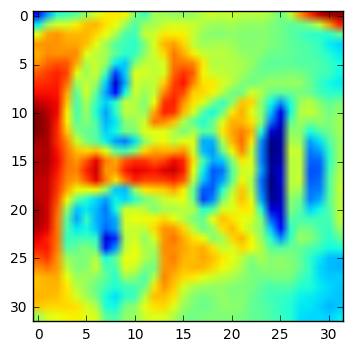

In [20]:
face = np.reshape(X[3,:], (32, 32))  
plt.imshow(face) 

In [21]:
U, S, V = pca(X)  
Z = project_data(X, U, 100)  

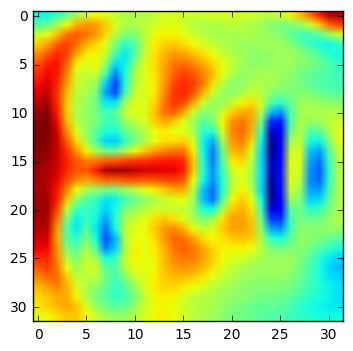

In [22]:
X_recovered = recover_data(Z, U, 100)  
face = np.reshape(X_recovered[3,:], (32, 32))  
plt.imshow(face)  